In [13]:
# All the imports

from __future__ import print_function, division
import keras
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, GaussianNoise
from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D
from keras.layers import MaxPooling2D, merge
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras import losses
from keras.utils import to_categorical
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
import glob

from keras import backend as K
from keras.layers import Layer

import copy

import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, Callback, TensorBoard
from keras import backend as keras

from scipy.io import loadmat
from scipy.io import savemat

from scipy.ndimage import zoom
#from scipy.misc import imresize
import pywt

import csv
import random
import time
%matplotlib inline  

import pywt
#import hdf5storage

import scipy.io as sio
from skimage.filters import threshold_otsu

#import pylidc as pl
#from keras.backend.tensorflow_backend import set_session
import tensorflow as tf

import pywt
import numpy as np
#import pydicom
import matplotlib.pyplot as plt
import SimpleITK as sitk
import skimage.io as io
#from sklearn.decomposition import PCA
import collections, numpy
import warnings
from scipy import ndimage, misc
warnings.filterwarnings('ignore')

#import pymrt as mrt
#import pymrt.geometry
import ipyvolume as ipv
import copy




#from image_gen import ImageDataGenerator
#from load_data import loadDataMontgomery, loadDataJSRT
#from build_model import build_UNet2D_4L

import pandas as pd
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint



import numpy
import warnings
from keras.layers import Convolution3D, Input, merge, RepeatVector, Activation
from keras.models import Model
from keras.layers.advanced_activations import PReLU
from keras import activations, initializers, regularizers
from keras.engine import Layer, InputSpec
from keras.utils.conv_utils import conv_output_length
#from keras.utils.np_utils import conv_output_length
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import keras.backend as K
from keras.engine.topology import Layer
import functools
import tensorflow as tf
import pickle
import time

In [2]:
# Helper Functions

def bbox2_3D(img):

    r = np.any(img, axis=(1, 2))
    c = np.any(img, axis=(0, 2))
    z = np.any(img, axis=(0, 1))

    rmin, rmax = np.where(r)[0][[0, -1]]
    cmin, cmax = np.where(c)[0][[0, -1]]
    zmin, zmax = np.where(z)[0][[0, -1]]

    return rmin, rmax, cmin, cmax, zmin, zmax

In [14]:
allshapesx = []
allshapesy = []
allshapesz = []

for i in range(1, 177):
    a = loadmat('/media/dril/ubuntudata/attenuation_values/'+str(i)+'.mat')
    a = a['head']
    b = copy.deepcopy(a)
    a[a != 0 ] = 1
    rmin, rmax, cmin, cmax, zmin, zmax = bbox2_3D(a)
    b = b[rmin:rmax, cmin:cmax, zmin:zmax]
    
    allshapesx.append(b.shape[0])
    allshapesy.append(b.shape[1])
    allshapesz.append(b.shape[2])
    
    h = {}
    h['head'] = b
    savemat('/media/dril/ubuntudata/attenuation_values_cropped/'+str(i)+'.mat', h)
    print(i, b.shape)

1 (697, 280, 401)
2 (696, 280, 401)
3 (695, 280, 401)
4 (782, 320, 422)
5 (584, 199, 323)
6 (583, 200, 322)
7 (584, 200, 329)
8 (582, 199, 328)
9 (784, 319, 422)
10 (783, 319, 422)
11 (695, 280, 401)
12 (692, 280, 401)
13 (584, 200, 329)
14 (583, 200, 329)
15 (615, 240, 417)
16 (695, 279, 400)
17 (786, 320, 418)
18 (784, 319, 422)
19 (698, 280, 389)
20 (786, 320, 422)
21 (696, 280, 401)
22 (697, 280, 388)
23 (616, 240, 406)
24 (616, 240, 419)
25 (785, 319, 422)
26 (697, 280, 401)
27 (784, 320, 390)
28 (784, 320, 420)
29 (697, 279, 390)
30 (784, 320, 420)
31 (785, 320, 421)
32 (785, 320, 421)
33 (784, 320, 415)
34 (585, 200, 329)
35 (695, 280, 401)
36 (785, 320, 421)
37 (695, 280, 401)
38 (785, 319, 422)
39 (785, 320, 414)
40 (785, 320, 421)
41 (784, 320, 422)
42 (698, 280, 390)
43 (786, 319, 421)
44 (785, 320, 422)
45 (583, 200, 329)
46 (784, 320, 422)
47 (617, 240, 418)
48 (698, 280, 401)
49 (582, 200, 328)
50 (616, 240, 419)
51 (616, 239, 418)
52 (584, 200, 329)
53 (614, 240, 406)
54

KeyboardInterrupt: 

In [15]:
print(b.shape)

(698, 280, 391)


In [36]:
temp = int((800-b.shape[0])/2)
vol = b
vol = np.pad(b, ((temp, 800-temp-b.shape[0]), (320-b.shape[1], 0), (0, 448-b.shape[2])), 
                 'constant', constant_values=(0, 0))
vol = np.moveaxis(vol, [1, 2], [2, 1])
print(vol.shape)             

(800, 448, 320)


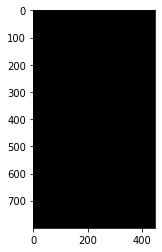

In [42]:
plt.imshow(vol[:, :, 310],cmap='gray')

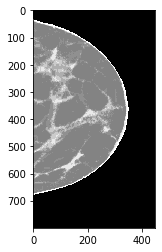

In [33]:
plt.imshow(vol[:, :, 240],cmap='gray')

In [ ]:
# New size will be 800, 320, 448

In [7]:

print(c.shape)

(785, 421, 320)


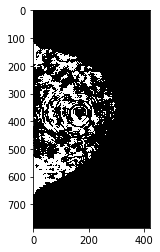

In [12]:
plt.imshow(c[:, :, 319], cmap='gray')